In [1]:
from matplotlib import use, cm
use('TkAgg')

import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from gradientDescentMulti import gradientDescentMulti
from normalEqn import normalEqn
from featureNormalize import featureNormalize
import numpy as np
from show import show

In [3]:
# ================ Part 1: Feature Normalization ================

print 'Loading data ...'

# Load Data
data = np.loadtxt('ex1data2.txt', delimiter=',')
X = data[:, :2]
y = data[:, 2]
m = y.T.size


# Print out some data points
print 'First 10 examples from the dataset:'
print np.column_stack( (X[:10], y[:10]) )
# raw_input("Program paused. Press Enter to continue...")

# Scale features and set them to zero mean
print 'Normalizing Features ...'

X, mu, sigma = featureNormalize(X)
print '[mu] [sigma]'
print mu, sigma

# Add intercept term to X
X = np.concatenate((np.ones((m, 1)), X), axis=1)
print np.column_stack( (X[:10], y[:10]) )

Loading data ...
First 10 examples from the dataset:
[[  2.10400000e+03   3.00000000e+00   3.99900000e+05]
 [  1.60000000e+03   3.00000000e+00   3.29900000e+05]
 [  2.40000000e+03   3.00000000e+00   3.69000000e+05]
 [  1.41600000e+03   2.00000000e+00   2.32000000e+05]
 [  3.00000000e+03   4.00000000e+00   5.39900000e+05]
 [  1.98500000e+03   4.00000000e+00   2.99900000e+05]
 [  1.53400000e+03   3.00000000e+00   3.14900000e+05]
 [  1.42700000e+03   3.00000000e+00   1.98999000e+05]
 [  1.38000000e+03   3.00000000e+00   2.12000000e+05]
 [  1.49400000e+03   3.00000000e+00   2.42500000e+05]]
Normalizing Features ...
[mu] [sigma]
[ 2000.68085106     3.17021277] [  7.86202619e+02   7.52842809e-01]
[[  1.00000000e+00   1.31415422e-01  -2.26093368e-01   3.99900000e+05]
 [  1.00000000e+00  -5.09640698e-01  -2.26093368e-01   3.29900000e+05]
 [  1.00000000e+00   5.07908699e-01  -2.26093368e-01   3.69000000e+05]
 [  1.00000000e+00  -7.43677059e-01  -1.55439190e+00   2.32000000e+05]
 [  1.00000000e+

Running gradient descent ...


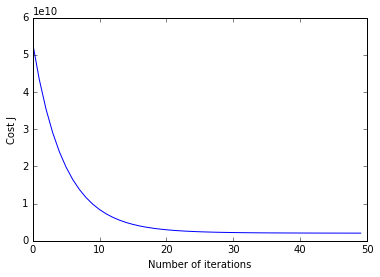

In [4]:
# ================ Part 2: Gradient Descent ================
#
# ====================== YOUR CODE HERE ======================
# Instructions: We have provided you with the following starter
#               code that runs gradient descent with a particular
#               learning rate (alpha).
#
#               Your task is to first make sure that your functions -
#               computeCost and gradientDescent already work with
#               this starter code and support multiple variables.
#
#               After that, try running gradient descent with
#               different values of alpha and see which one gives
#               you the best result.
#
#               Finally, you should complete the code at the end
#               to predict the price of a 1650 sq-ft, 3 br house.
#
# Hint: By using the 'hold on' command, you can plot multiple
#       graphs on the same figure.
#
# Hint: At prediction, make sure you do the same feature normalization.
#

print 'Running gradient descent ...'

# Choose some alpha value
alpha = 0.1
num_iters = 400

# Init Theta and Run Gradient Descent 
theta = np.zeros(3)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Plot the convergence graph
plt.plot(J_history[:50], '-b')
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
show()



In [5]:
#raw_input("Program paused. Press Enter to continue...")

# Display gradient descent's result
print 'Theta computed from gradient descent: '
print theta

# Estimate the price of a 1650 sq-ft, 3 br house
price = np.append([1.], ([1650, 3] - mu) / sigma).dot(theta)

print 'Predicted price of a 1650 sq-ft, 3 br house'
print '(using gradient descent): '
print price

#raw_input("Program paused. Press Enter to continue...")

Theta computed from gradient descent: 
[ 340412.65957447  109447.79558639   -6578.3539709 ]
Predicted price of a 1650 sq-ft, 3 br house
(using gradient descent): 
293081.464529


In [6]:
# ================ Part 3: Normal Equations ================

# ====================== YOUR CODE HERE ======================
# Instructions: The following code computes the closed form
#               solution for linear regression using the normal
#               equations. You should complete the code in
#               normalEqn.m
#
#               After doing so, you should complete this code
#               to predict the price of a 1650 sq-ft, 3 br house.
#

print 'Solving with normal equations...'

# Load Data
data = np.loadtxt('ex1data2.txt', delimiter=',')
X = data[:, :2]
y = data[:, 2]
m = y.T.size

# Add intercept term to X
X = np.concatenate((np.ones((m,1)), X), axis=1)

# Calculate the parameters from the normal equation
theta = normalEqn(X, y)

# Display normal equation's result
print 'Theta computed from the normal equations:'
print ' %s \n' % theta


Solving with normal equations...
Theta computed from the normal equations:
 [ 89597.9095428     139.21067402  -8738.01911233] 



In [7]:

# Estimate the price of a 1650 sq-ft, 3 br house
price = np.array([1, 1650, 3]).dot(theta)

# ============================================================

print "Predicted price of a 1650 sq-ft, 3 br house "
print '(using normal equations):\n $%f\n' % price

#raw_input("Program paused. Press Enter to continue...")

Predicted price of a 1650 sq-ft, 3 br house 
(using normal equations):
 $293081.464335

